In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def show(img):
    if img.ndim == 2:
        plt.imshow(img, cmap='gray')
    else:
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        plt.imshow(img)
    plt.show()

## 1. 直方图阈值

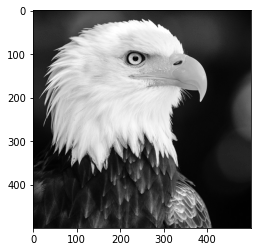

In [3]:
img = cv.imread('pic/eagle500x500.jpg', 0)
show(img)

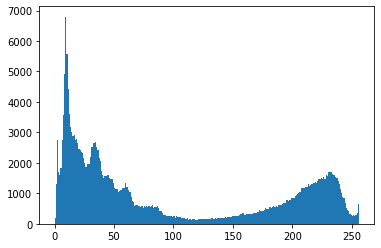

In [4]:
plt.hist(img.ravel(), 256, [0, 256])
plt.show()

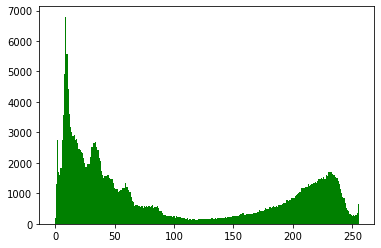

In [5]:
plt.hist(img.flatten(), np.arange(-0.5, 256, 1), color='g')
plt.show()

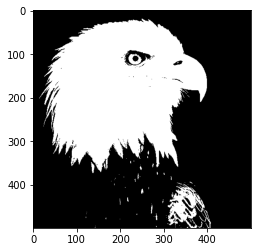

In [8]:
_, img_bin = cv.threshold(img, 125, 255, cv.THRESH_BINARY) #inverse
show(img_bin)

## 2. 三角法阈值

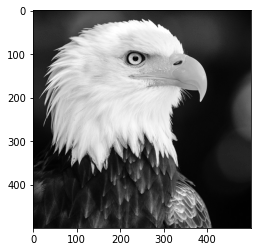

In [13]:
# img = cv.imread('pic/blossom500x500.jpg', 0)
img = cv.imread('pic/eagle500x500.jpg', 0)
show(img)

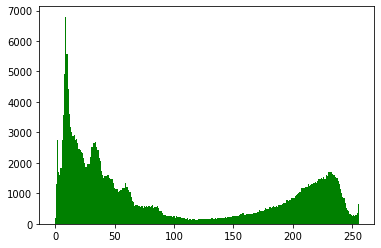

In [14]:
plt.hist(img.flatten(), np.arange(-0.5, 256, 1), color='g')
plt.show()

68.0


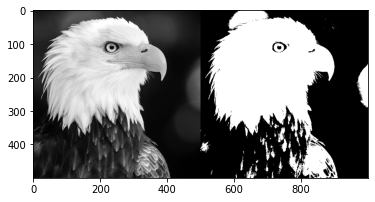

In [15]:
th, img_bin = cv.threshold(img, 0, 255, cv.THRESH_TRIANGLE)
print(th)
show(np.hstack([img, img_bin]))

## 3. 迭代法阈值

In [26]:
img = cv.imread('pic/eagle500x500.jpg', 0)

T = img.mean()

while True:
    t0 = img[img < T].mean()
    t1 = img[img >= T].mean()
    t  = (t0 + t1) / 2
    if abs(T - t) < 1:
        break
    T = t
T = int(T)

print(f"Best threshold = {T}")

Best threshold = 120


## 4. 大津法阈值

120.0


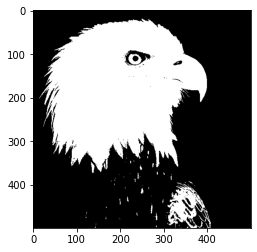

In [56]:
img = cv.imread('pic/eagle500x500.jpg', 0)

th, img_bin = cv.threshold(img, -1, 255, cv.THRESH_OTSU)
print(th)
show(img_bin)

In [62]:
img = cv.imread('pic/eagle500x500.jpg', 0)

Sigma = -1
T = 0

for t in range(0, 256):
    bg  = img[img <= t]
    obj = img[img > t]
    
    p0 = bg.size / img.size
    p1 = obj.size / img.size
    
    m0 = 0 if bg.size == 0 else bg.mean()
    m1 = 0 if obj.size == 0 else obj.mean()
    
    sigma = p0 * p1 * (m0 - m1)**2
    
    if sigma > Sigma:
        Sigma = sigma
        T = t
        
print(f"Best threshold = {T}")

Best threshold = 120


## 5. 自适应阈值分割

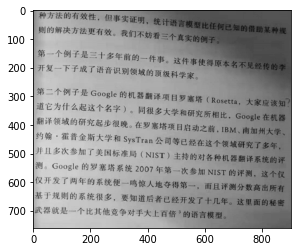

In [3]:
img = cv.imread('pic/page760x900.jpg', 0)
show(img)

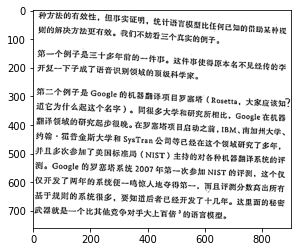

In [9]:
img_bin = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, 
                            cv.THRESH_BINARY, 21, 6)
show(img_bin)

## 6.6 自适应阈值分割实现

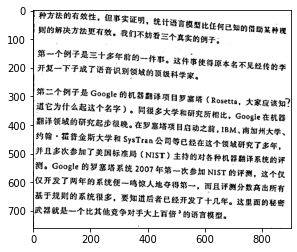

In [14]:
img = cv.imread('pic/page760x900.jpg', 0)

C = 6
winSize = 21

img_blur = cv.blur(img, (winSize, winSize))
img_bin = np.uint8(img > img_blur.astype(np.int) - C) * 255

show(img_bin)

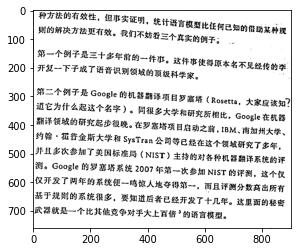

In [17]:
img = cv.imread('pic/page760x900.jpg', 0)

alpha = 0.05
winSize = 21

img_blur = cv.GaussianBlur(img, (winSize, winSize), 5)
img_bin = np.uint8(img > (1 - alpha) * img_blur) * 255

show(img_bin)